# Part II - Ford GoBike Analysis
## by Taiwo Ajagunsegun

## Investigation Overview


> For this presentation, I focus on the distribution of the features and the relationships that exist between them.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
A total of 183,412 bike trips were recorded in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Create a new column named "Age" from the "member_birth_year" column

from datetime import datetime
df['Age'] = datetime.today().year - df['member_birth_year']

# Drop all the observations with Age greater than 80 years old.
df = df[df['Age'] <= 80]

## Duration of Duration_sec column

The duration_sec column is heavily skewed to the right meaning that most of the trips are short trips. 

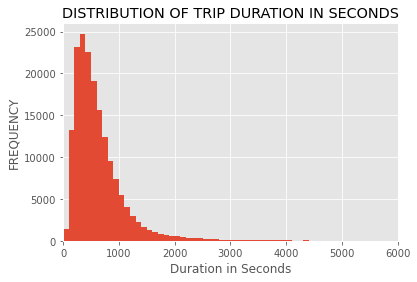

In [3]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim(0, 6000);
plt.title('DISTRIBUTION OF TRIP DURATION IN SECONDS')
plt.xlabel('Duration in Seconds')
plt.ylabel('FREQUENCY');

## Relationship between Duration_sec column and Age column.

Younger people spend more time in their trips compared to older people. From the above plot, members between the ages of 20 years and 50 years spent the higher percentage of time in their trips. Also, members that shared all their trips are distributed all over the dataset with respect to their ages.

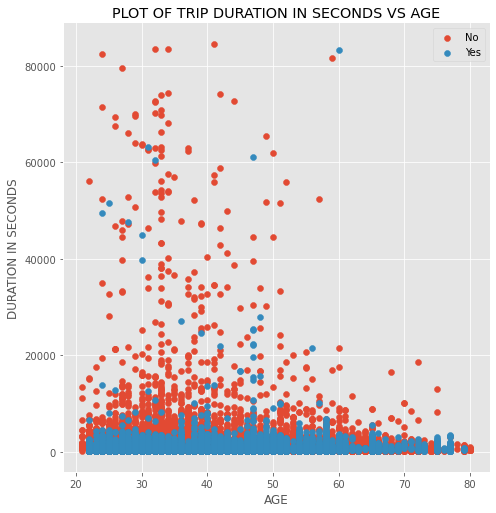

In [4]:
g = sns.FacetGrid(data = df, hue = 'bike_share_for_all_trip', size = 7)
g.map(plt.scatter, 'Age', 'duration_sec' )
plt.title('PLOT OF TRIP DURATION IN SECONDS VS AGE')
plt.legend()
plt.xlabel('AGE')
plt.ylabel('DURATION IN SECONDS');

## Comparing the distribution of the user_type column by the bike_share_for_all_trip column

Members that shared bike for all their trips are basically subscribers. None of the customers shared a bike for all their trips.

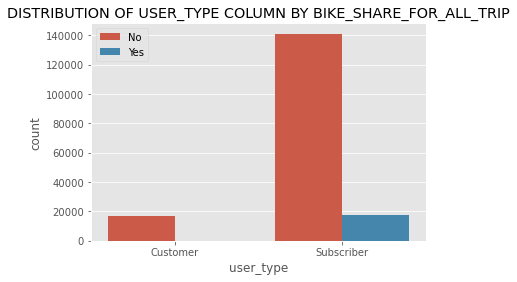

In [5]:
sns.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.title('DISTRIBUTION OF USER_TYPE COLUMN BY BIKE_SHARE_FOR_ALL_TRIP');
plt.legend(loc = 2);

In [ ]:
!jupyter nbconvert Part-II-Presentation.ipynb --to slides --post serve --no-input --no-prompt